# Linear Regression using sklearn's Calfornia Housing Data set

## Install Scikit-learn Library

In [22]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd

## Load Data
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [27]:
from sklearn.datasets import fetch_california_housing
housing_data = fetch_california_housing()


In [29]:
#Features data are provided in housing_data.data
housing_data.data, housing_data.feature_names

(array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'])

In [31]:
#Target data is provided in housing_data.target
housing_data.target, housing_data.target_names

(array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 ['MedHouseVal'])

In [35]:
#Build X (Features) and y (Target)
X = pd.DataFrame(data=housing_data.data, columns=housing_data.feature_names)

y = pd.DataFrame(data=housing_data.target, columns=housing_data.target_names)

In [37]:
df = pd.concat([X, y], axis =1)

#MedHouseVal column is is the unit of 100,000. e.g., 4.5 represents $450,000

In [39]:
#Merge X and y to build df
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Perform Data Analysis

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [44]:
df.describe()
# df.describe().map(lambda x: format(x, ".2f"))

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


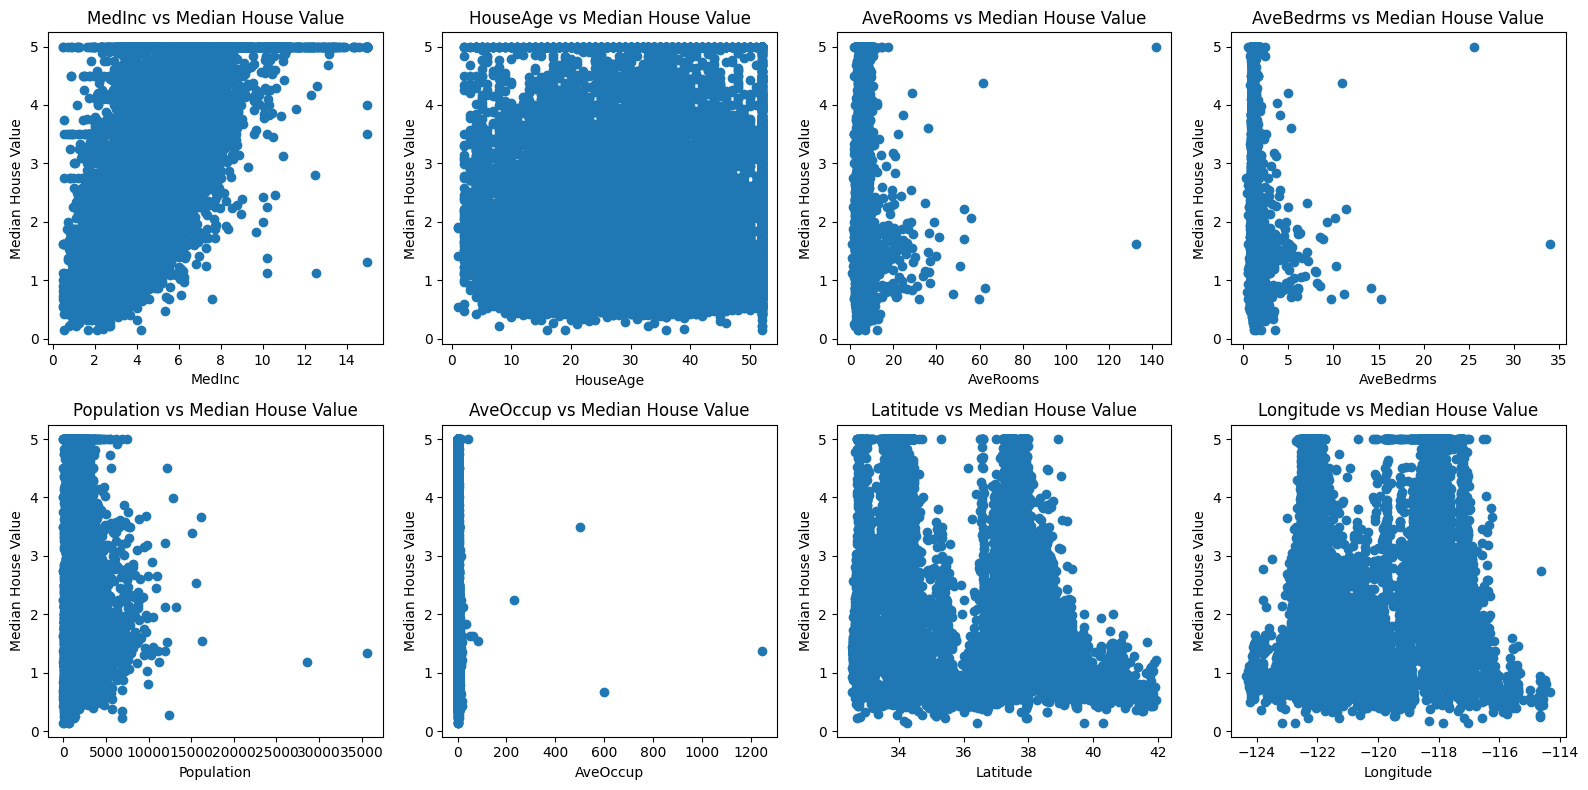

In [46]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 4, figsize=(16, 8))
axs = axs.flatten()  # Flatten 2D grid into 1D array for easy indexing

for i, column in enumerate(df.columns[:-1]):  # Exclude 'target'
    axs[i].scatter(df[column], df['MedHouseVal'])
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Median House Value')
    axs[i].set_title(f'{column} vs Median House Value')

plt.tight_layout()
plt.show()

In [47]:
corr = df.corr()
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


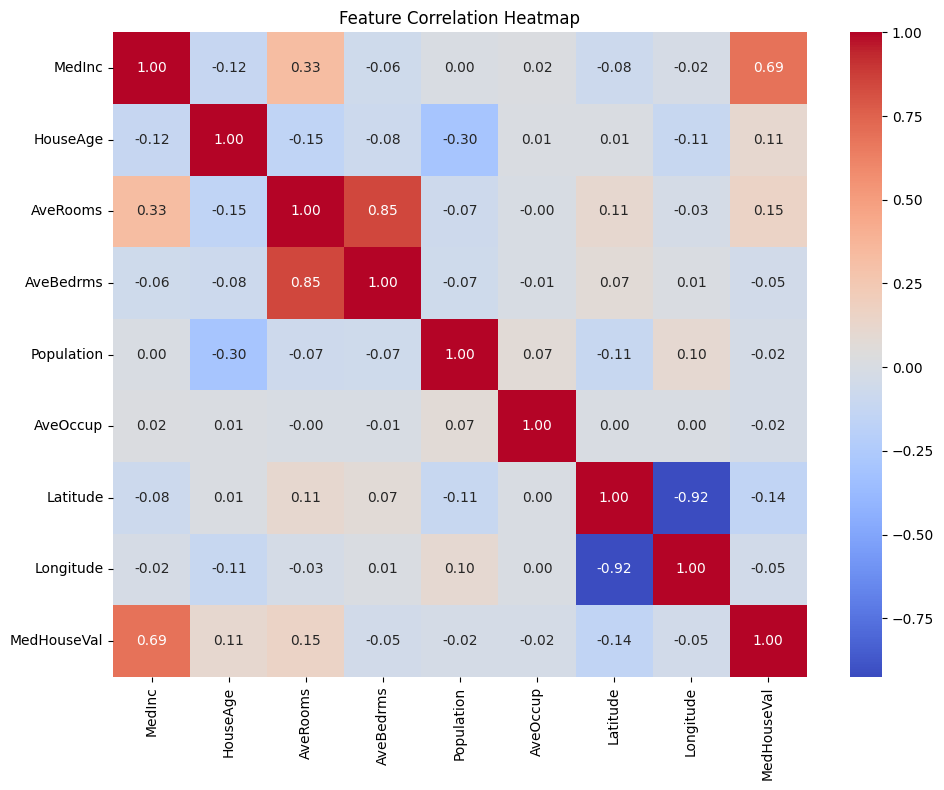

In [50]:
import seaborn as sns

# Set figure size
plt.figure(figsize=(10, 8))

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()

plt.show()

## Create a model

In [53]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [57]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [59]:
model.fit(X_train, y_train)

LinearRegression()

In [61]:
model.coef_

array([[ 4.26724825e-01,  9.54238148e-03, -9.15463302e-02,
         5.76291626e-01, -7.01409319e-06, -3.25595935e-03,
        -4.31047817e-01, -4.41971090e-01]])

In [63]:
#Making model.coef_ more readable
formatted_coefs = [format(coef, ".3f") for coef in model.coef_.flatten()]
print(formatted_coefs)

['0.427', '0.010', '-0.092', '0.576', '-0.000', '-0.003', '-0.431', '-0.442']


## Evaluate the model performance on Train Data(Mean Squared Error, Mean Absolute Error, Root Mean Squared Error)

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

y_train_preds = model.predict(X_train)

mae_train = mean_absolute_error(y_train_preds, y_train)
mse_train = mean_squared_error(y_train_preds, y_train)
rmse_train = root_mean_squared_error(y_train_preds, y_train)

format(mae_train, "0.4f"), format(mse_train, "0.4f"), format(rmse_train, "0.4f")

/Users/amiteshsinha/amitesh_work/github_repo_2025/machine-learning-and-artificial-intelligence/ensemble_learning/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:281: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/amiteshsinha/amitesh_work/github_repo_2025/machine-learning-and-artificial-intelligence/ensemble_learning/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:281: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/amiteshsinha/amitesh_work/github_repo_2025/machine-learning-and-artificial-intelligence/ensemble_learning/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:281: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_


('0.5379', '0.5406', '0.7353')

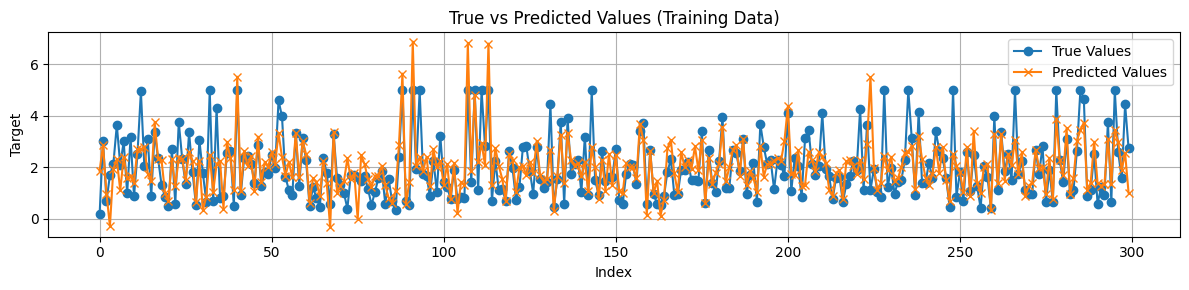

In [68]:
plt.figure(figsize=(12, 3))

# Plot true vs predicted values
plt.plot(y_train.values[:300], label='True Values', marker='o')
plt.plot(y_train_preds[:300], label='Predicted Values', marker='x')

plt.title('True vs Predicted Values (Training Data)')
plt.xlabel('Index')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Evaluate the model performance on Test Data(Mean Squared Error, Mean Absolute Error, Root Mean Squared Error)

In [73]:
y_test_preds = model.predict(X_test)

mse_test = mean_squared_error(y_test_preds, y_test)
rmse_test = root_mean_squared_error(y_test_preds, y_test)
mae_test = mean_absolute_error(y_test_preds, y_test)

format(mae_test, "0.4f"), format(mse_test, "0.4f"), format(rmse_test, "0.4f")

/Users/amiteshsinha/amitesh_work/github_repo_2025/machine-learning-and-artificial-intelligence/ensemble_learning/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:281: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/amiteshsinha/amitesh_work/github_repo_2025/machine-learning-and-artificial-intelligence/ensemble_learning/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:281: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/amiteshsinha/amitesh_work/github_repo_2025/machine-learning-and-artificial-intelligence/ensemble_learning/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:281: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_


('0.5224', '0.4872', '0.6980')

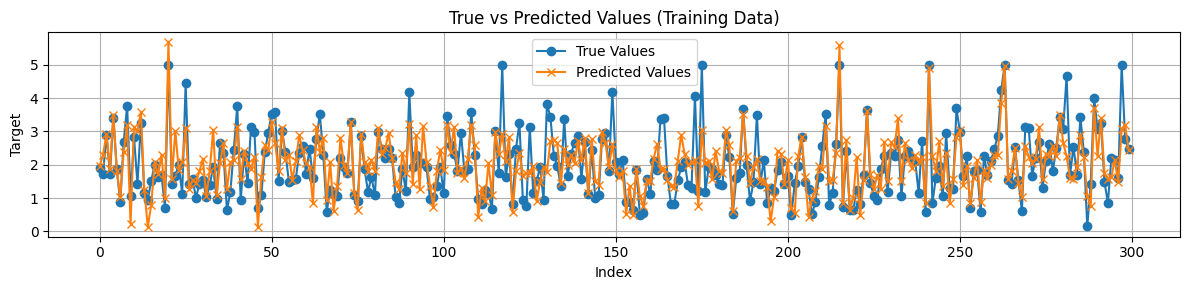

In [75]:
plt.figure(figsize=(12, 3))

# Plot true vs predicted values
plt.plot(y_test.values[:300], label='True Values', marker='o')
plt.plot(y_test_preds[:300], label='Predicted Values', marker='x')

plt.title('True vs Predicted Values (Training Data)')
plt.xlabel('Index')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Compare train and test error rates

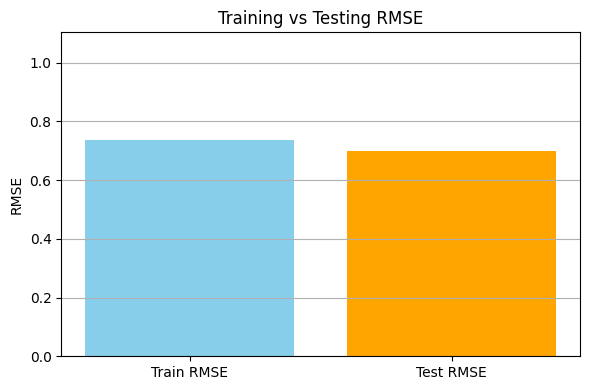

In [78]:
# Bar chart
plt.figure(figsize=(6, 4))
plt.bar(['Train RMSE', 'Test RMSE'], [rmse_train, rmse_test], color=['skyblue', 'orange'])

plt.ylabel('RMSE')
plt.title('Training vs Testing RMSE')
plt.ylim(0, max(rmse_train, rmse_test) * 1.5)  # Add a little headroom
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [80]:
# As the target is in 100,000s, the Train RMSE of 0.7276 means error value to 0.7276 * 100, 000
rmse_dollar_value = format((rmse_train * 100000), ",.2f")
print( f"The Training RMSE or Deviation from predicted value is ${rmse_dollar_value}")

The Training RMSE or Deviation from predicted value is $73,526.63
